In [1]:
%matplotlib inline

In [ ]:
# Load FS example data
from arpes.io import load_data
f = load_data('FS_AN_25eV_CIRCP_0000.h5', location="ULTRA")

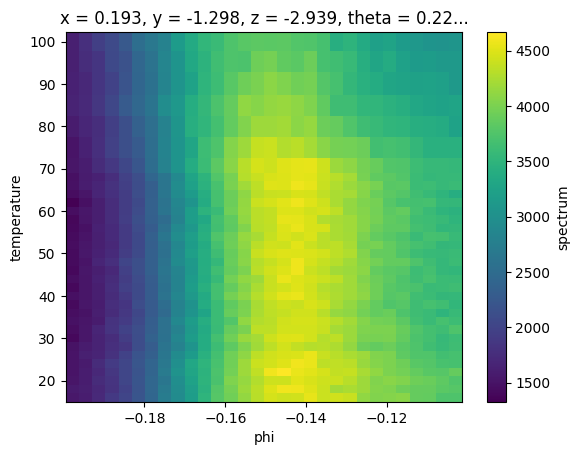

In [64]:
from arpes.io import example_data
from matplotlib import pyplot as plt

temp_dep = example_data.temperature_dependence
near_ef = temp_dep.sel(eV=slice(-0.05, 0.05), phi=slice(-0.2, None)).sum("eV")
near_ef.S.plot()

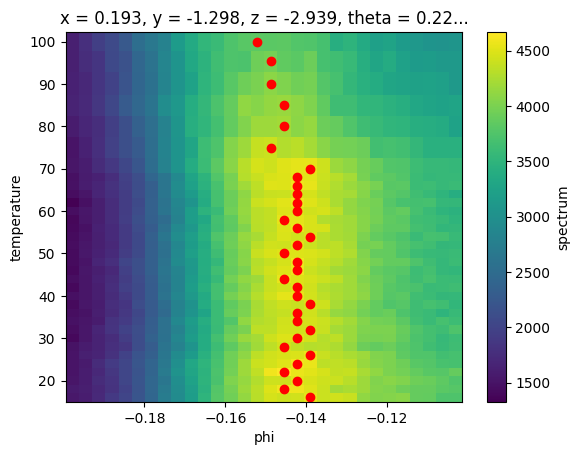

In [65]:
argmax_indices = near_ef.spectrum.argmax(dim="phi")
argmax_phis = near_ef.phi[argmax_indices]

fig, ax = plt.subplots()
near_ef.S.plot(ax=ax)
ax.scatter(*argmax_phis.G.to_arrays()[::-1], color="red")

In [66]:
from arpes.fits.utilities import broadcast_model
from arpes.fits.fit_models import LorentzianModel, AffineBackgroundModel, AffineBroadenedFD

phis = broadcast_model(
    # Fit with two components, a linear background and a Lorentzian peak
    [AffineBackgroundModel, LorentzianModel],
    # fit across the entire `near_ef` dataset
    near_ef,
    # fit along each value of "temperature"
    "temperature"
)
phis

Running on multiprocessing pool... this may take a while the first time.


Fitting on pool...:   0%|          | 0/34 [00:00<?, ?it/s]

Deserializing...
Finished deserializing


<xarray.Dataset>
Dimensions:        (temperature: 34, phi: 30)
Coordinates:
  * temperature    (temperature) float64 16.0 18.0 20.0 ... 90.06 95.44 99.98
    x              float64 0.193
    y              float64 -1.298
    z              float64 -2.939
    theta          float64 0.2273
    beta           float64 0.0
    chi            float64 -0.2618
    hv             float64 55.4
    alpha          float64 1.571
    psi            int32 0
  * phi            (phi) float64 -0.1978 -0.1946 -0.1913 ... -0.1063 -0.103
Data variables:
    results        (temperature) object <lmfit.model.ModelResult object at 0x...
    data           (temperature, phi) float64 1.535e+03 1.591e+03 ... 3.066e+03
    residual       (temperature, phi) float64 -126.9 -29.14 ... 7.805 -29.28
    norm_residual  (temperature, phi) float64 -0.08268 -0.01831 ... -0.009548

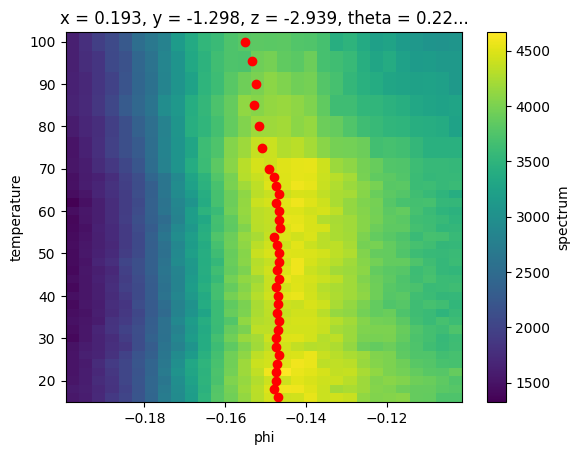

In [67]:
fig, ax = plt.subplots()
near_ef.S.plot(ax=ax)
ax.scatter(*phis.F.p("b_center").G.to_arrays()[::-1], color="red")

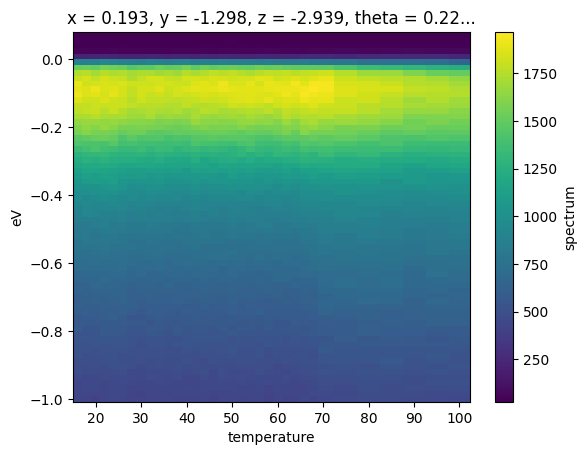

In [68]:
# take the Lorentzian (component `b`) center parameter
phi_values = phis.F.p("b_center")
temp_dep.spectrum.S.select_around_data(
    {"phi": phi_values}, mode="mean", fast=True, radius={"phi": 0.005}).S.plot()

In [90]:
phis.results[0].item()

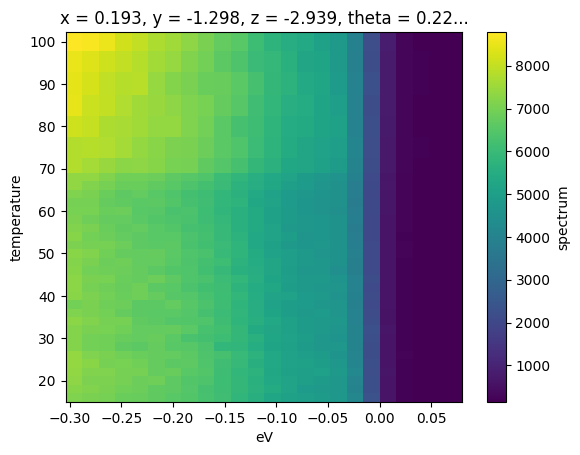

In [96]:
off_band = temp_dep.sel(eV=slice(-0.3, None), phi=slice(None, -0.24)).sum("phi")
off_band.S.plot()

In [101]:
from arpes.fits.utilities import broadcast_model
from arpes.fits.fit_models import AffineBroadenedFD, LorentzianModel
off_phis = broadcast_model(AffineBroadenedFD, off_band, "temperature")

Running on multiprocessing pool... this may take a while the first time.


Fitting on pool...:   0%|          | 0/34 [00:00<?, ?it/s]

Deserializing...
Finished deserializing


In [102]:
off_phis

<xarray.Dataset>
Dimensions:        (temperature: 34, eV: 24)
Coordinates:
  * temperature    (temperature) float64 16.0 18.0 20.0 ... 90.06 95.44 99.98
    x              float64 0.193
    y              float64 -1.298
    z              float64 -2.939
    theta          float64 0.2273
    beta           float64 0.0
    chi            float64 -0.2618
    hv             float64 55.4
    alpha          float64 1.571
    psi            int32 0
  * eV             (eV) float64 -0.2959 -0.2799 -0.2639 ... 0.05611 0.07211
Data variables:
    results        (temperature) object <lmfit.model.ModelResult object at 0x...
    data           (temperature, eV) float64 7.123e+03 7.063e+03 ... 171.0 161.0
    residual       (temperature, eV) float64 226.8 125.9 58.33 ... 6.002 15.98
    norm_residual  (temperature, eV) float64 0.03184 0.01783 ... 0.03509 0.09922

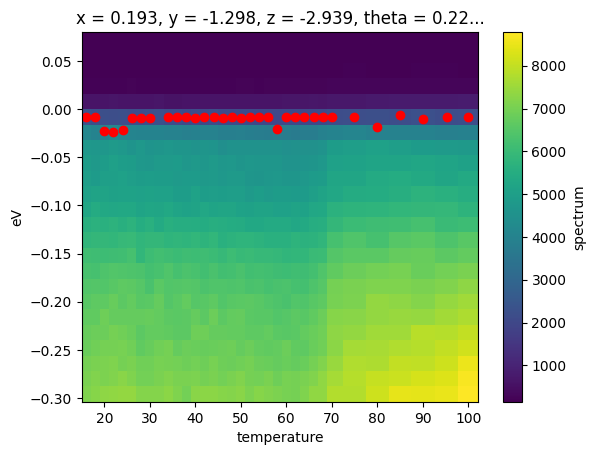

In [103]:
fig, ax = plt.subplots()
off_band.spectrum.T.plot(ax=ax)
ax.scatter(*off_phis.F.p("fd_center").G.to_arrays(), color="red")

In [104]:
off_phis.F.p("fd_center").G.to_arrays()

(array([16.  , 18.  , 20.  , 22.  , 24.  , 26.  , 28.  , 30.  , 32.  ,
        34.  , 36.  , 38.  , 40.  , 42.  , 44.  , 46.  , 48.  , 50.  ,
        52.  , 54.  , 56.  , 58.  , 60.  , 62.  , 64.  , 66.  , 68.  ,
        70.  , 74.88, 80.02, 84.97, 90.06, 95.44, 99.98]),
 array([-0.00768857, -0.00852307, -0.02255324, -0.0232695 , -0.02156655,
        -0.00905851, -0.00871709, -0.00865524,  0.17081037, -0.00810245,
        -0.00821284, -0.00820964, -0.00903749, -0.00819451, -0.00814224,
        -0.00886555, -0.00825877, -0.00867872, -0.00813097, -0.00829426,
        -0.00834356, -0.02031638, -0.00818112, -0.00822694, -0.00819762,
        -0.00820837, -0.00821369, -0.00848865, -0.00844832, -0.018057  ,
        -0.00608176, -0.00967594, -0.00839601, -0.00813637]))

In [105]:
off_phis.results[0].item()